<a href="https://colab.research.google.com/github/JamalMorales/Artificial-intelligence/blob/main/Assignments/AF6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 6.- Convolutional Neural Network**

Name: Jamal Morales Sánchez ID: 2064497 Hour: N2-002

Name: Abigail Montserrat Nieto Solís ID: 2059067 Hour: N2-002

Name: Evelyn Rubí Martinez Ruíz ID: 2071292 Hour: N2-002

Name: Carlos Ernesto Martinez ID: 1975221 Hour: N2-002

Name: Gabriela Mariana Rangel Carrillo ID: 2006071 Hour: N2-002

# **1. Load libraries**
These tools will be used to build and evaluate the classification model.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


# **2. Load data**

We use the datasets.mnist.load_data() from Keras, and verify the upload of the code

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


Now verify the basic shapes of the training model

In [ ]:
print("Shapes:")
print("train_images:", train_images.shape, "train_labels:", train_labels.shape)
print("test_images:", test_images.shape, "test_labels:", test_labels.shape)


Shapes:
train_images: (60000, 28, 28, 1) train_labels: (60000,)
test_images: (10000, 28, 28, 1) test_labels: (10000,)


And along with that, we checked the model's types and ranges

In [ ]:
print("\ntypes and ranges:")
print("dtype images (train):", train_images.dtype, "min/max:", train_images.min(), train_images.max())
print("dtype labels (train):", train_labels.dtype, "unique:", np.unique(train_labels))



types and ranges:
dtype images (train): float32 min/max: 0.0 0.003921569
dtype labels (train): uint8 unique: [0 1 2 3 4 5 6 7 8 9]


We visualize 25 examples from our database.

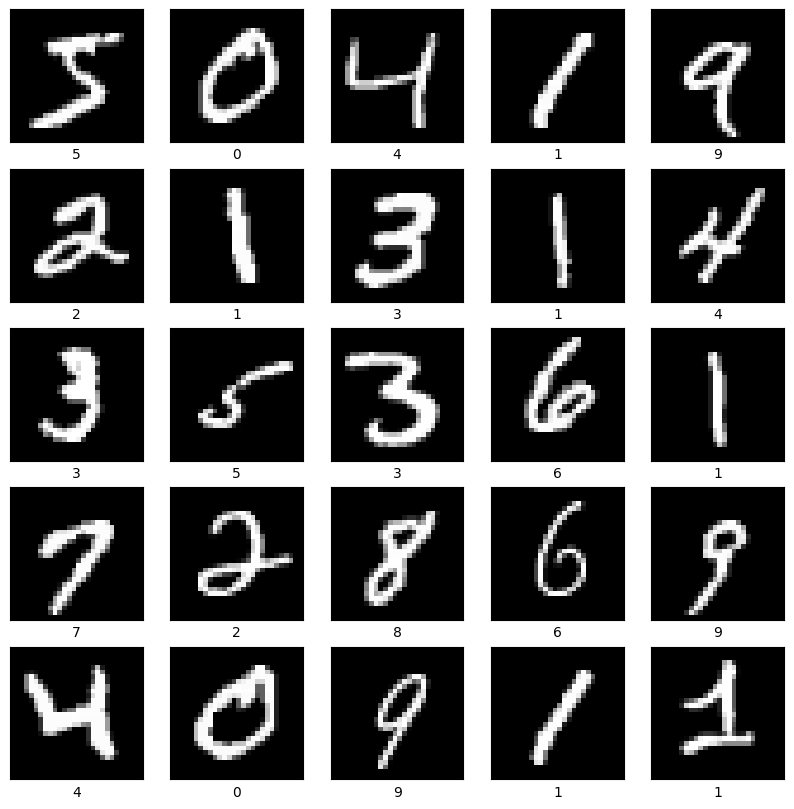

In [ ]:
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]);
    plt.yticks([]);
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap="gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **3. Data preprocessing**

Before proceeding with the definition of our model, we must start by normalizing the data between 0 and 1

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255.0
test_images  = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255.0


# **4. Model selection and training**

Based on the assigned example, we will use 6 lines of code aimed at defining the convolutional base using the pattern of a stack of layers, Conv2D and MaxPooling2D. The previously created tensors are taken, and the input data will be processed in different subdivisions, such as 32.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))


We present the architecture of the current model and how it is functioning:

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

To be able to complete it, we add to our model some outputs from the convolutional base tensor, at various layers, it can be just one. These Dense layers allow the vectors to be taken as input and processed with the 10 classes of our model.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

We now look at the final architecture of our model

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,322 (1.07 MB)

 Trainable params: 94,676 (369.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

# **5. Model testing**

Compile and train the model

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=9,
                    validation_data=(test_images, test_labels))

Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.1555 - loss: 2.1984 - val_accuracy: 0.4787 - val_loss: 1.2936
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.5149 - loss: 1.2223 - val_accuracy: 0.7121 - val_loss: 0.8189
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.6989 - loss: 0.8652 - val_accuracy: 0.7578 - val_loss: 0.7038
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.7665 - loss: 0.6902 - val_accuracy: 0.7954 - val_loss: 0.6121
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.8146 - loss: 0.5808 - val_accuracy: 0.8558 - val_loss: 0.4941
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.8387 - loss: 0.5157 - val_accuracy: 0.8796 - val_loss: 0.3970
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.8783 - loss: 0.4078 - val_accuracy: 0.8670 - val_loss: 0.4442
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.8772 - loss: 0

We examine the evaluation of the model with respect to the epoch and the accuracy of the values in comparison.

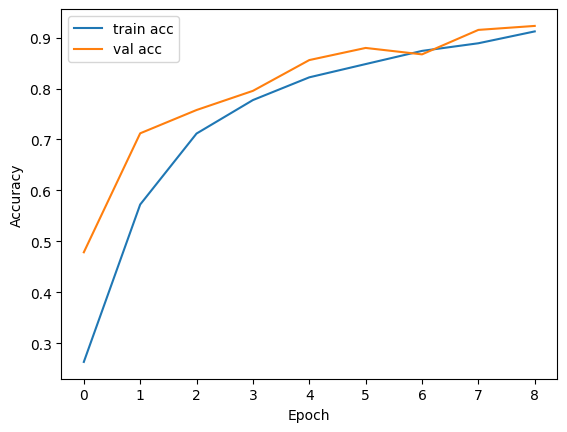

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.show()

And finally we see the test accuracy value

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9791 - loss: 0.0632
Test accuracy: 0.9791


# Helper plotting functions

With this, we will be able to visualize the 5 predictions of our model, and whether it was able to correctly predict the actual values.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


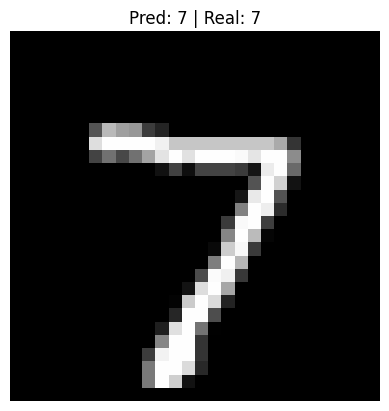

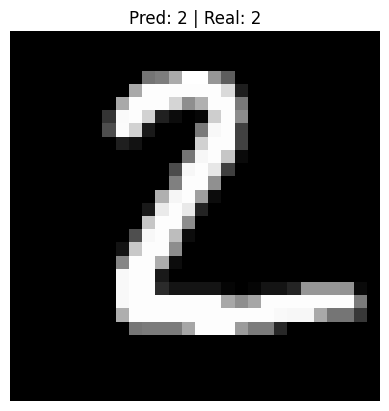

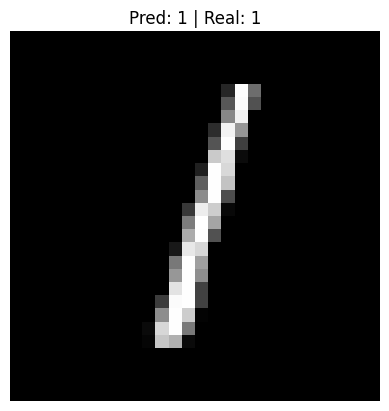

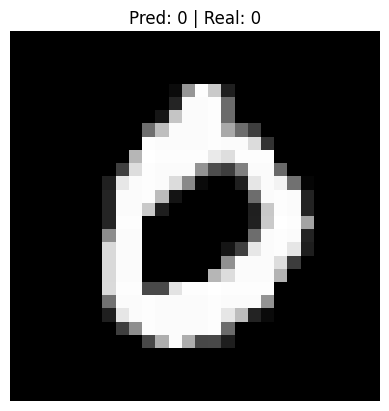

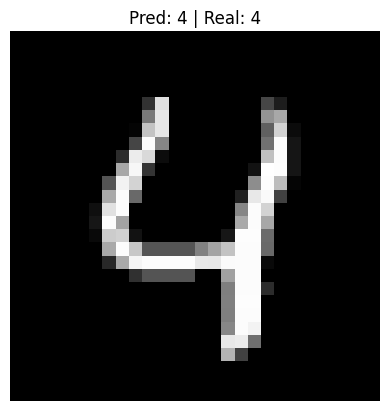

In [ ]:
predictions = model.predict(test_images[:5])
for i in range(5):
    plt.imshow(test_images[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {predictions[i].argmax()} | Real: {test_labels[i]}")
    plt.axis("off")
    plt.show()

For this second part, we will execute code with an FFNN model to appropriately compare the two models; we will not delve deeply into the steps.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Flatten + normalize
x_train_ff = train_images.reshape(len(train_images), -1).astype("float32") / 255.0
x_test_ff  = test_images.reshape(len(test_images), -1).astype("float32") / 255.0

# 2. Standardize
scaler = StandardScaler()
x_train_ff = scaler.fit_transform(x_train_ff)
x_test_ff  = scaler.transform(x_test_ff)

# 3. Define MLP with more iterations
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation="relu",
    solver="adam",
    max_iter=50,        # aumentar épocas
    batch_size=128,
    random_state=42
)

# 4. Train
mlp.fit(x_train_ff, train_labels)

# 5. Evaluate
y_pred_ff = mlp.predict(x_test_ff)
acc_ff = accuracy_score(test_labels, y_pred_ff)
print(f"FFNN test accuracy: {acc_ff:.4f}")

# 6. Show 5 predictions
for i in range(5):
    print(f"Prediction: {y_pred_ff[i]} | Real: {test_labels[i]}")



FFNN test accuracy: 0.9765
Prediction: 7 | Real: 7
Prediction: 2 | Real: 2
Prediction: 1 | Real: 1
Prediction: 0 | Real: 0
Prediction: 4 | Real: 4
